In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [248]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [79]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [249]:
housing_data = pd.concat([train_data, test_data], axis=0, sort=False)
#concatenate two dataframes (train and test data) along row (row-wise addition)


In [81]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [61]:
housing_data.shape

(2919, 80)

In [250]:
missing = np.sum(housing_data.isnull())

In [251]:
missing[missing>0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

PoolQC - replace na with no
miscfeature - replace na with no 
alley - replace na with no
fence - replace na with no


#lotfrontage na how to impute? KNN?
#garage, bsmt -- feature engineering (multicollinear)
#masvnrtype -- missing?


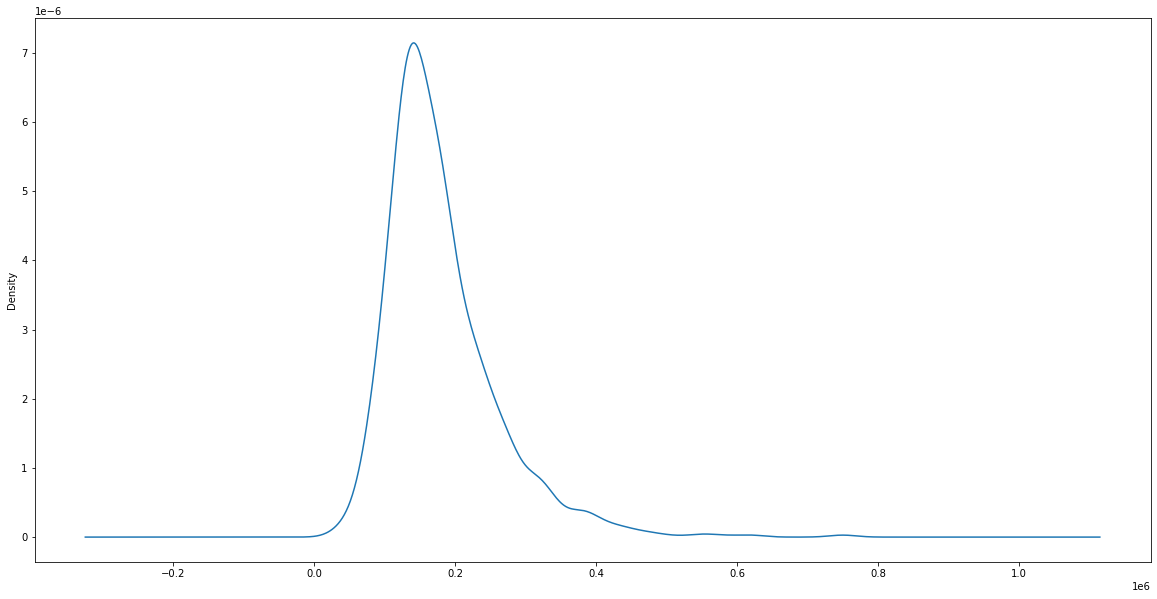

In [67]:
housing_data['SalePrice'].plot(kind='kde', figsize = (20,10))

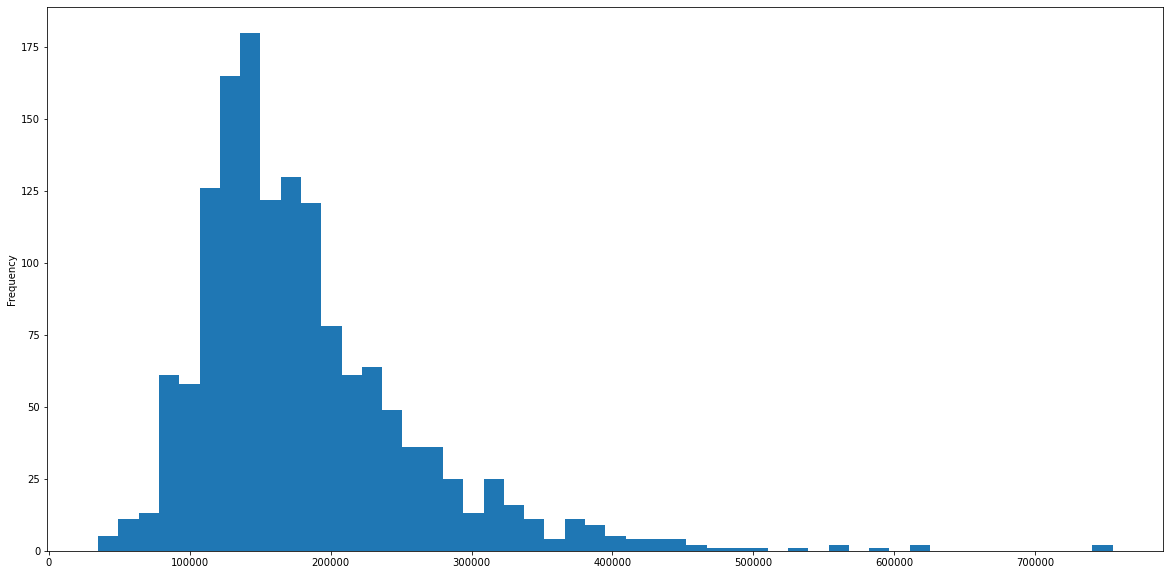

In [68]:
housing_data['SalePrice'].plot(kind='hist', figsize = (20,10), bins =50)

rightskewed distribution / positive skewness
next step: categorical (nominal & ordinal) vs numerical features

In [69]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [84]:
corrMatrix = housing_data.corr()
corrMatrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


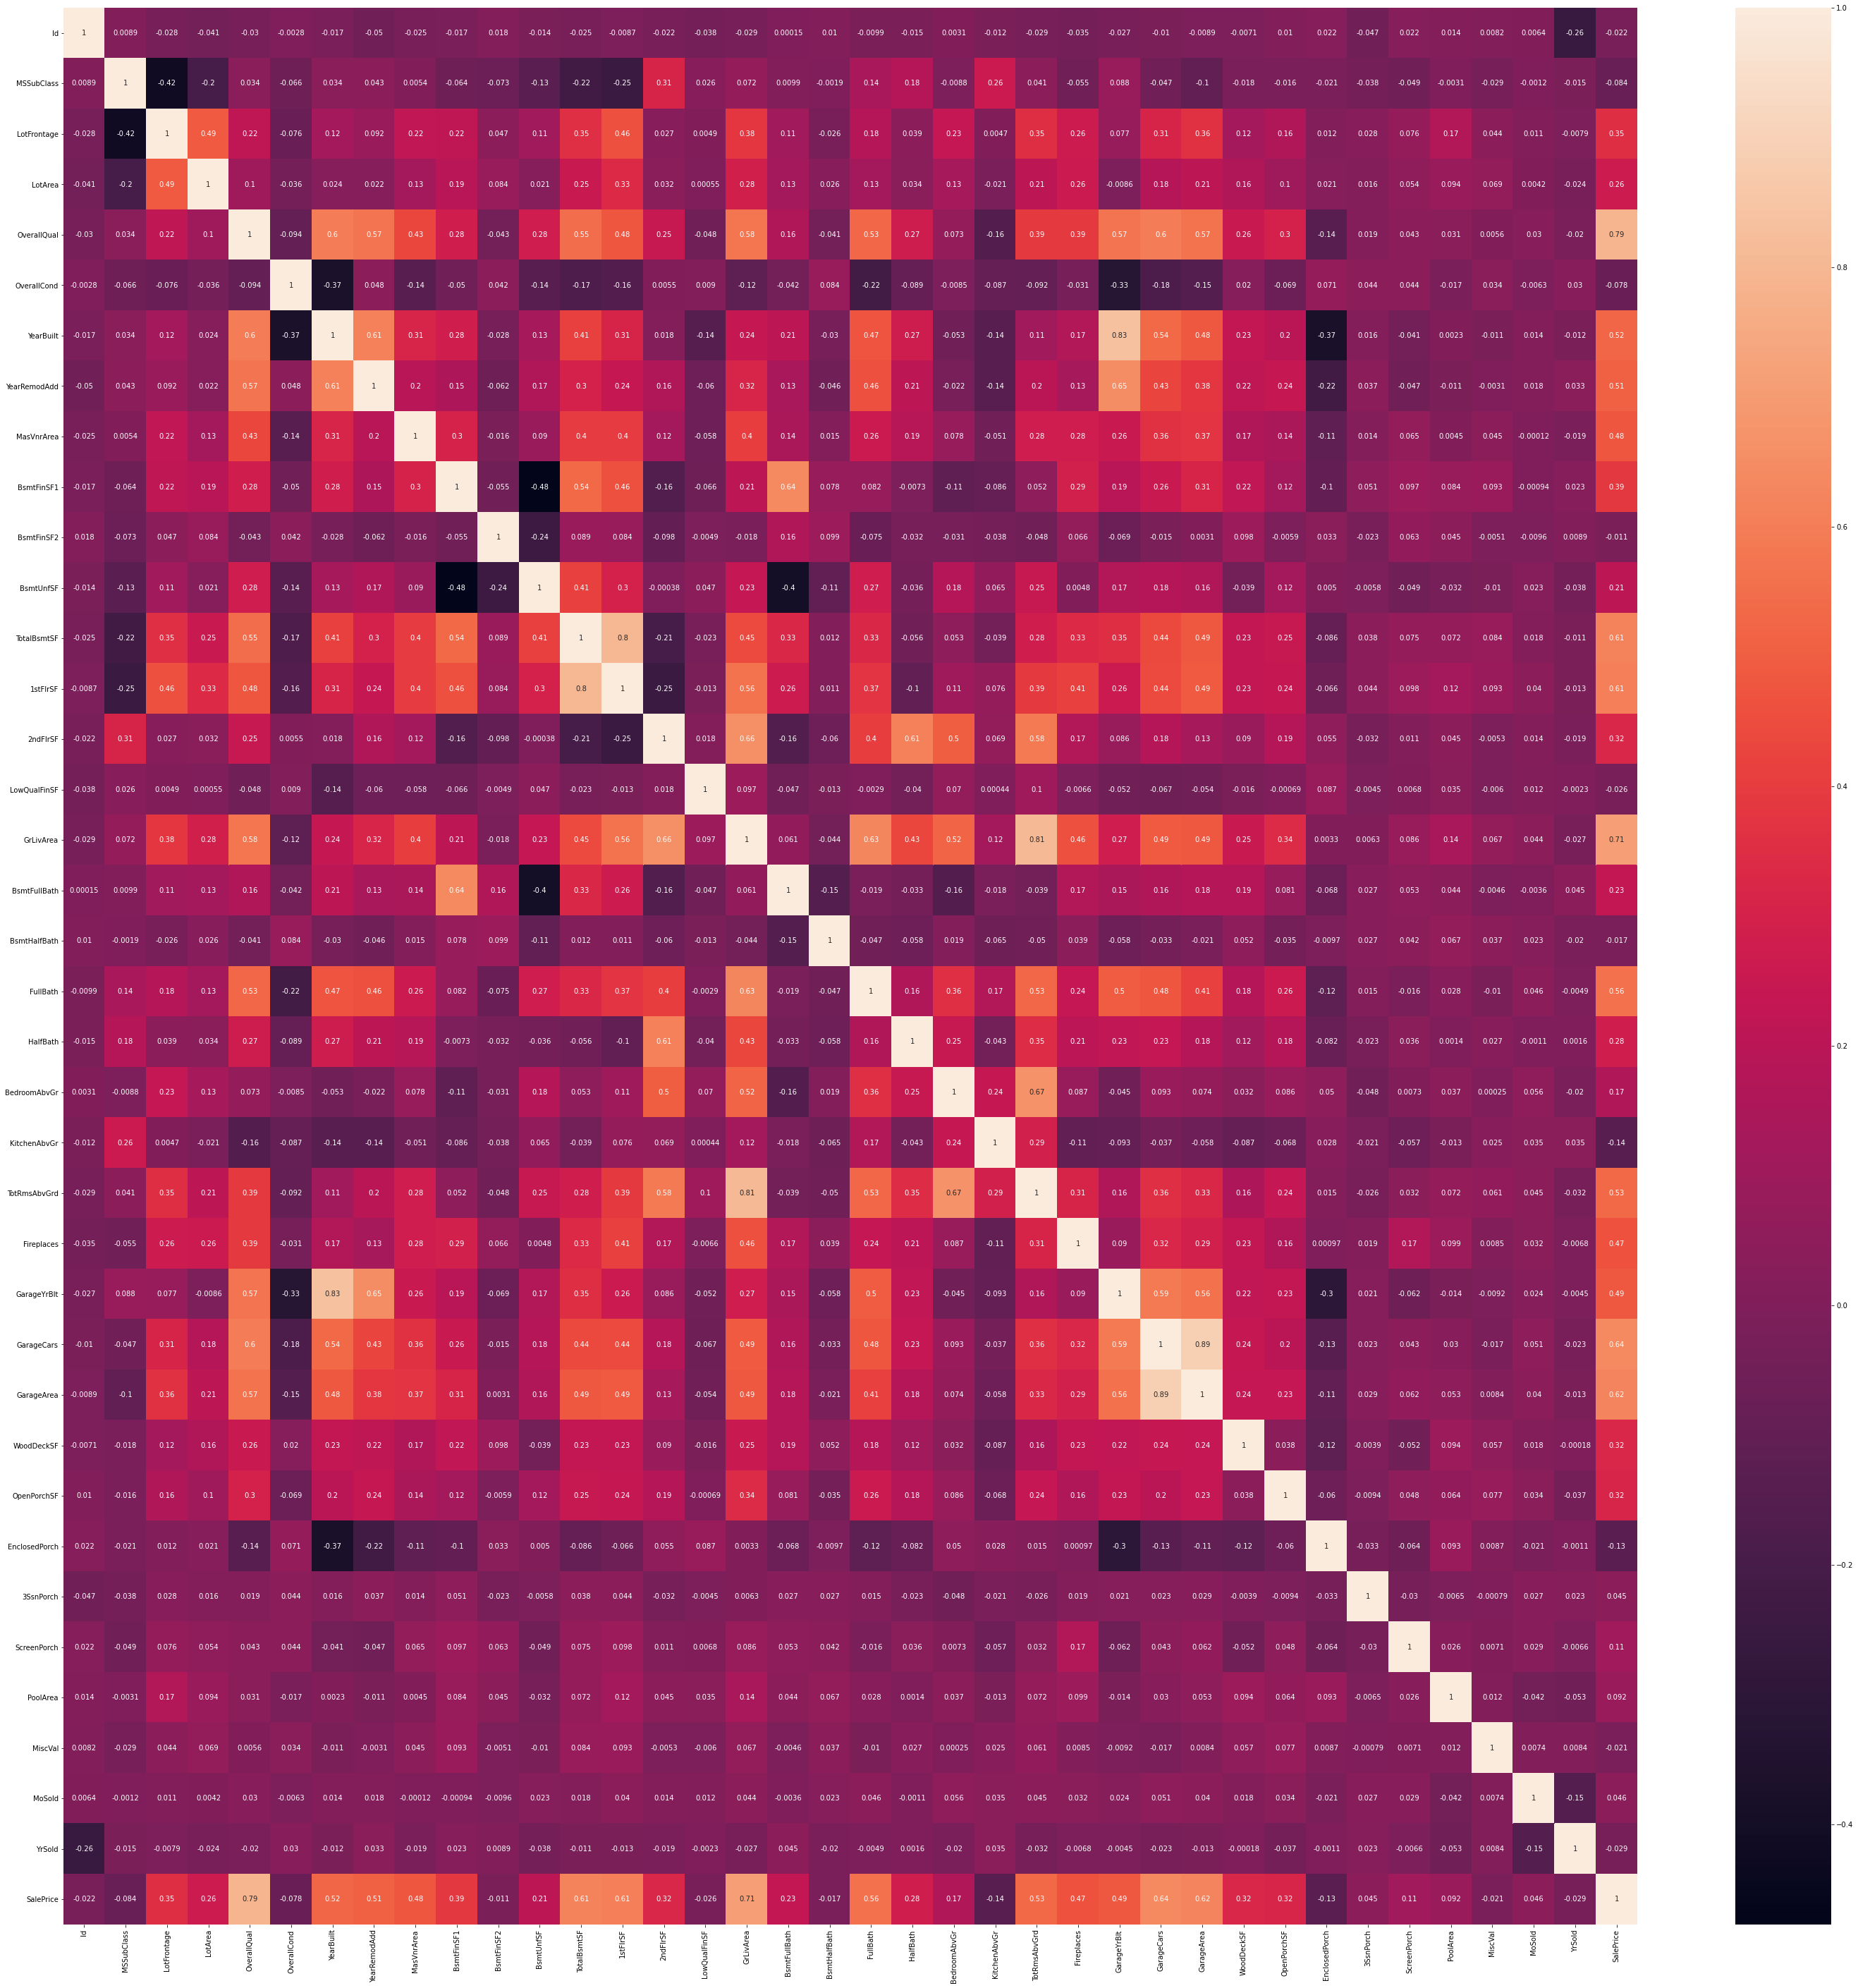

In [85]:
plt.subplots(figsize=(50,50))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [87]:
corrMatrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [261]:
categorical = train_data.select_dtypes(include=['object'])
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [45]:
numerical = train_data.select_dtypes(include=['int','float']).dtypes

#categorical and numerical multicollinearity, find a way to identify
#nominal vs ordinal 

In [253]:
housing_data = housing_data.drop(['Id'], axis = 1) #drop ID column


In [254]:
missing[missing>0].sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [255]:
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('NE')
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('NE')
housing_data['Alley'] = housing_data['Alley'].fillna('NE')
housing_data['Fence'] = housing_data['Fence'].fillna('NE')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('NE')

In [256]:
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('NE')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NE')
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NE')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('NE')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NE')
housing_data['BsmtFullBath'] = housing_data['BsmtFullBath'].fillna(0.0)
housing_data['BsmtHalfBath'] = housing_data['BsmtHalfBath'].fillna(0.0)
housing_data['BsmtFinSF2'] = housing_data['BsmtFinSF2'].fillna(0)
housing_data['BsmtUnfSF'] = housing_data['BsmtUnfSF'].fillna(0)
housing_data['BsmtFinSF1'] = housing_data['BsmtFinSF1'].fillna(0)
housing_data['TotalBsmtSF'] = housing_data['TotalBsmtSF'].fillna(0)

In [257]:
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NE')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('NE')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('NE')
housing_data['GarageType'] = housing_data['GarageType'].fillna('NE')
housing_data['GarageCars'] = housing_data['GarageCars'].fillna(0)
housing_data['GarageArea'] = housing_data['GarageArea'].fillna(0)
#missing values should be the same but not


In [258]:
output = housing_data['SalePrice']
housing_data = housing_data.drop('SalePrice', axis = 1)

In [272]:
s= np.sum(housing_data.isnull())
s[s>0]

MSZoning         4
LotFrontage    486
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
MasVnrArea      23
Electrical       1
KitchenQual      1
Functional       2
GarageYrBlt    159
SaleType         1
dtype: int64

In [266]:
categorical = list(categorical.columns)

In [270]:
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = categorical

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(housing_data[columns])

#https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

In [274]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(housing_data)),columns = housing_data.columns)

Imputing row 1/2919 with 0 missing, elapsed time: 2.775
Imputing row 101/2919 with 1 missing, elapsed time: 2.787
Imputing row 201/2919 with 0 missing, elapsed time: 2.789
Imputing row 301/2919 with 0 missing, elapsed time: 2.791
Imputing row 401/2919 with 0 missing, elapsed time: 2.792
Imputing row 501/2919 with 0 missing, elapsed time: 2.793
Imputing row 601/2919 with 0 missing, elapsed time: 2.794
Imputing row 701/2919 with 0 missing, elapsed time: 2.796
Imputing row 801/2919 with 0 missing, elapsed time: 2.797
Imputing row 901/2919 with 1 missing, elapsed time: 2.799
Imputing row 1001/2919 with 0 missing, elapsed time: 2.801
Imputing row 1101/2919 with 0 missing, elapsed time: 2.802
Imputing row 1201/2919 with 0 missing, elapsed time: 2.803
Imputing row 1301/2919 with 1 missing, elapsed time: 2.805
Imputing row 1401/2919 with 0 missing, elapsed time: 2.806
Imputing row 1501/2919 with 1 missing, elapsed time: 2.807
Imputing row 1601/2919 with 0 missing, elapsed time: 2.808
Imputing 

In [279]:
encode_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3.0,65.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0
1,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0
2,60.0,3.0,68.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0
3,70.0,3.0,60.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0
4,60.0,3.0,84.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160.0,4.0,21.0,1936.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,6.0,2006.0,8.0,4.0
2915,160.0,4.0,21.0,1894.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,4.0,2006.0,8.0,0.0
2916,20.0,3.0,160.0,20000.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,9.0,2006.0,8.0,0.0
2917,85.0,3.0,62.0,10441.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,2.0,3.0,700.0,7.0,2006.0,8.0,4.0


In [244]:
cat_variables = housing_data[['MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Functional_Maj2,Functional_Min1,Functional_Min2,...,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [245]:
housing_data = housing_data.drop(['MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical'], axis=1)
housing_data = pd.concat([housing_data, cat_dummies], axis=1)
housing_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,60,65.0,8450,Pave,NE,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,Pave,NE,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,Pave,NE,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,0,1
3,70,60.0,9550,Pave,NE,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,Pave,NE,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,1,0,0,0,0,0,1


In [247]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(housing_data)

ValueError: could not convert string to float: 'Pave'

In [ ]:
knn
# housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna('NE')
# housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna('NE') doesnt exist
# housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('NE')
# housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna('NE')
# housing_data['MSZoning'] = housing_data['MSZoning'].fillna('NE')
# housing_data['Functional'] = housing_data['Functional'].fillna('NE')
# housing_data['Utilities'] = housing_data['Utilities'].fillna('NE')
# housing_data['SaleType'] = housing_data['SaleType'].fillna('NE')
# housing_data['KitchenQual'] = housing_data['KitchenQual'].fillna('NE')
# housing_data['Exterior2nd'] = housing_data['Exterior2nd'].fillna('NE')
# housing_data['Exterior1st'] = housing_data['Exterior1st'].fillna('NE')
# housing_data['Electrical'] = housing_data['Electrical'].fillna('NE')


In [209]:
# g = housing_data['GarageYrBlt'].isnull()
g = housing_data[['BsmtCond']].isnull()

In [211]:
g.loc[g['BsmtCond'] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  580,  590,  606,  608,  660,  662,
             725,  728,  729,  730,  733,  756,  764,  927,  975,  992,  993,
            1030, 1038, 1064, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306,
            1343, 1344, 1364, 1431, 1444],
           dtype='int64')

In [213]:
j = housing_data[['BsmtFinType1']].isnull()

In [214]:
j.loc[j['BsmtFinType1'] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  590,  606,  608,  660,  662,  728,
             729,  730,  733,  756,  764,  927,  975,  992,  993, 1030, 1038,
            1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364,
            1431, 1444],
           dtype='int64')

In [208]:
housing_data[housing_data['BsmtUnfSF'].isna()].BsmtCond


660    NaN
Name: BsmtCond, dtype: object

In [220]:
housing_data.iloc[590].BsmtCond

'TA'

In [230]:
housing_data[housing_data['GarageArea'].isnull()].GarageCond

1116    NaN
Name: GarageCond, dtype: object